## Reward Curves for fedML

Where:
- \(C\) is the contribution level.
- \(T\) is the threshold at which the curve transitions from linear to exponential.
- \(k\) is the linear rate of earnings below the threshold.
- \(a\) and \(b\) are parameters that determine the shape of the exponential curve.
- \(e\) is the base of the natural logarithm.

Let's assume the following parameters for our example:
- Threshold (\(T\)) = 100 (units of contribution)
- Linear rate (\(k\)) = 10 (earnings per unit of contribution below the threshold)
- Exponential parameters (\(a\) = 5, \(b\) = 0.05)

- Exponential parameters (\(a\) = 5, \(b\) = 0.05)
This means for contributions up to 100, earnings increase linearly at a rate of 10 earnings per unit of contribution. Beyond 100, earnings grow exponentially with the base rate and shape determined by \(a\) and \(b\).

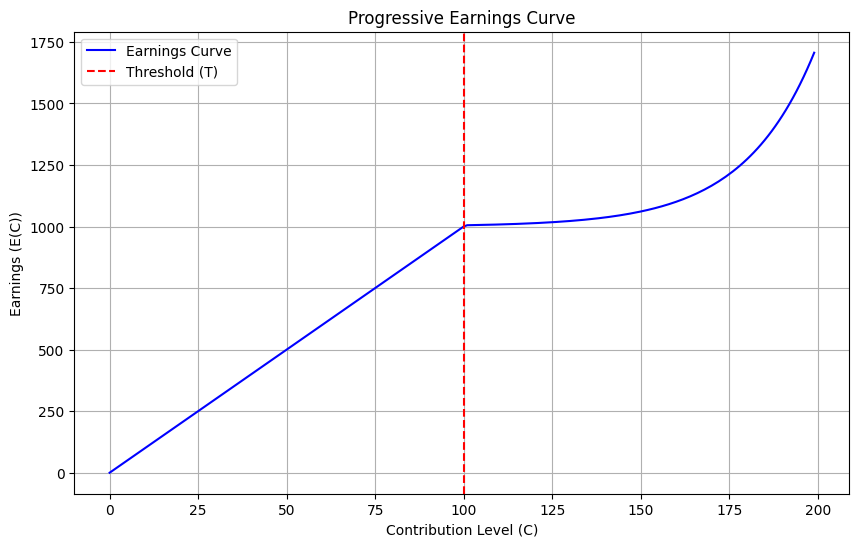

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# parameters
T = 100  # threshold for linear to exponential transition
k = 10   # lin earnings rate
a = 5    # exp base rate
b = 0.05 # exp growth rate

# piecewise function
def earnings_curve(C):
    if C <= T:
        return k * C
    else:
        return k * T + a * np.exp(b * (C - T))

# range of contribution levels
contribution_levels = np.arange(0, 200, 1)

# calc earnings for each contribution level
earnings = np.array([earnings_curve(C) for C in contribution_levels])


plt.figure(figsize=(10, 6))
plt.plot(contribution_levels, earnings, label="Earnings Curve", color="blue")
plt.axvline(x=T, color="red", linestyle="--", label="Threshold (T)")
plt.title("Progressive Earnings Curve")
plt.xlabel("Contribution Level (C)")
plt.ylabel("Earnings (E(C))")
plt.legend()
plt.grid(True)
plt.show()


E_C = k * T + a * exp(b * (C - T))
E_C

The curve is a piecewise function where:
- \(C\) represents the contribution level.
- \(E(C)\) denotes the earnings for a given contribution level.
- \(T\) is the threshold where the curve transitions from linear to exponential growth.
- \(k\) signifies the rate of earnings increase per contribution unit below the threshold.
- \(a\) and \(b\) are parameters shaping the exponential growth rate beyond the threshold.
- \(e\) is natural log
### Example Scenarios
how the curve behaves for different levels of contribution
#### Scenario 1: Below the Threshold
- Contribution (\(C\)) = 50 (below the threshold \(T\) of 100)
- Linear rate (\(k\)) = 10
\[ E(50) = k \cdot C = 10 \cdot 50 = 500 \]
This means a contribution of 50 units yields earnings of 500 tokens, reflecting the linear part of the curve.
#### Scenario 2: At the Threshold
- Contribution (\(C\)) = 100 (exactly at the threshold)
- Linear rate (\(k\)) = 10
\[ E(100) = k \cdot C = 10 \cdot 100 = 1000 \]
A contribution at the threshold earns 1000 tokens, marking the transition point on the curve.
#### Scenario 3: Above the Threshold
- Contribution (\(C\)) = 150 (above the threshold)
- Parameters: \(k = 10\), \(T = 100\), \(a = 5\), \(b = 0.05\)
\[ E(150) = k \cdot T + a \cdot e^{b(C-T)} = 10 \cdot 100 + 5 \cdot e^{0.05(150-100)} \]
Let's calculate this to see the earnings for a contribution of 150 units.


i.e. for a contribution level of 150 units, the earnings calculated using the progressive curve are approximately 1061 tokens.

In [ ]:
import numpy as np

M_base = 500000
M_max = 1000000
U = 0.8
Total_Contributions = 50000
Contribution_Target = 100000
w1, w2 = 0.5, 0.5

Reputation_Earned = 200
Total_Reputation_Earned = 5000
Node_Stake = 10000
Total_Stake = 200000

# Calculate f(U, Total Contributions)
f_U_TotalContributions = (w1 * U) + (w2 * (Total_Contributions / Contribution_Target))

# Calculate M_total
M_total = M_base + (M_max - M_base) * f_U_TotalContributions

# Calculate Node Earnings
Node_Earnings = M_total * ((U * (Reputation_Earned / Total_Reputation_Earned)) + ((1 - U) * (Node_Stake / Total_Stake)))

M_total, Node_Earnings


(825000.0, 34650.0)

## Observations

The first issue with the formula is that it is not clear how the reputation score ( R ) is calculated, and if it is a value between 0 and 1 or if it could potentially scale beyond these bounds, which would affect the distribution of earnings significantly. The reputation score could potentially include factors such as successful task completions, accuracy of computations, uptime, and trustworthiness. It could be a normalized or weighted score based on these factors.

Secondly, the Utilization Rate ( U ) is another critical factor, as it dictates the portion of earnings that comes from active deployment versus that from merely staking tokens. During periods of low utilization, staked nodes would receive more, which might encourage over-staking and underutilization. It could be beneficial to have a more dynamic system that adjusts to network needs without creating a situation where nodes are incentivized to remain idle.

The Base Emission ( M ) is fixed in the short term but varies with the network's computation activity. Without details on the emission adjustment mechanism, it might be difficult to understand the volatility of earnings for nodes, which is a crucial factor in their financial planning.

An improvement to this framework could include a more transparent and adjustable payout ratio between stake-based and reputation-based earnings to better align node behavior with the needs of the network. Moreover, there should be a cap on how much the Base Emission can fluctuate within a given period. This ensures predictability for nodes and protects the network from potential gaming or exploitation.

## V2 includes cap ratio

In [1]:
import numpy as np
import pandas as pd

# Hypothetical scenario assumptions
# Assumed base emission for the network, which is a pool of available tokens to be distributed monthly
base_emission = 100000  # M
# Assumed network utilization rate, which reflects the proportion of nodes that are actively participating
utilization_rate = 0.75  # U, 75% of nodes are active
# Assumed individual node stake relative to the total network stake (hypothetical)
node_stake_ratio = 0.01  # S, 1% of the total stake in the network
# Assumed individual node reputation score, NOTE THAT WE NORMALIZE HERE, WILL MAKE MORE SENSE LATER
node_reputation_score = 0.85  # R, normalized between 0 and 1

# og formula for a node's earnings
def calculate_node_earnings(M, U, S, R):
    return (M * (1 - U) * S) + (M * U * R)

# Calculate node earnings with the provided hypothetical scenario
node_earnings_original = calculate_node_earnings(base_emission, utilization_rate, node_stake_ratio, node_reputation_score)

# Now consider an improved formula where the payouts are adjusted to incentivize active
# participation, and cap stake-based rewards to prevent underutilization:
# For simplicity, cap the stake-based rewards to no more than 20% of the reputation-based rewards

# new formula including a cap ratio
def calculate_node_earnings_improved(M, U, S, R, cap_ratio):
    stake_earnings = M * (1 - U) * S
    reputation_earnings = M * U * R
    # Implementing the cap on the stake-based rewards
    stake_earnings = min(stake_earnings, reputation_earnings * cap_ratio)
    return stake_earnings + reputation_earnings

cap_ratio = 0.20  # Cap stake-based earnings at 20% of reputation-based earnings
node_earnings_improved = calculate_node_earnings_improved(base_emission, utilization_rate, node_stake_ratio, node_reputation_score, cap_ratio)

node_earnings_original, node_earnings_improved

(64000.0, 64000.0)

In [4]:
# v1 vs v2 comparison with varying parameters

# Define a range of utilization rates, node stake ratios and reputation scores to analyze
# this helps us understand how nodes respond to different levels of activity, stake, and reputation
utilization_rates = np.array([0.25, 0.50, 0.75, 1.00])  # Different levels of network activity
node_stake_ratios = np.array([0.01, 0.05, 0.10, 0.20])  # From low to very high stake
node_reputation_scores = np.array([0.1, 0.5, 0.85, 1.0])  # From very low to perfect reputation

# calculate node earnings for each combination of utilization rate, stake ratio, and reputation score
earnings_data = []
for u in utilization_rates:
    for s in node_stake_ratios:
        for r in node_reputation_scores:
            original_earnings = calculate_node_earnings(base_emission, u, s, r)
            improved_earnings = calculate_node_earnings_improved(base_emission, u, s, r, cap_ratio)
            earnings_data.append({
                'Utilization Rate': u,
                'Stake Ratio': s,
                'Reputation Score': r,
                'Original Earnings': original_earnings,
                'Improved Earnings': improved_earnings,
                'Cap Applied': original_earnings != improved_earnings
            })

# covert to df for better visualization
earnings_df = pd.DataFrame(earnings_data)

earnings_df.sort_values(by=['Utilization Rate', 'Stake Ratio', 'Reputation Score'], inplace=True)
earnings_df.reset_index(drop=True, inplace=True)

earnings_df.head(50)

,Utilization Rate,Stake Ratio,Reputation Score,Original Earnings,Improved Earnings,Cap Applied
0,0.25,0.01,0.10,3250.0,3000.0,True
1,0.25,0.01,0.50,13250.0,13250.0,False
2,0.25,0.01,0.85,22000.0,22000.0,False
3,0.25,0.01,1.00,25750.0,25750.0,False
4,0.25,0.05,0.10,6250.0,3000.0,True
5,0.25,0.05,0.50,16250.0,15000.0,True
6,0.25,0.05,0.85,25000.0,25000.0,False
7,0.25,0.05,1.00,28750.0,28750.0,False
8,0.25,0.10,0.10,10000.0,3000.0,True
9,0.25,0.10,0.50,20000.0,15000.0,True


## Observations on the above

When nodes have a low reputation score (indicating lower participation or performance), the cap is frequently applied, regardless of the stake ratio or utilization rate. This ensures that such nodes do not receive high stake-based rewards at the expense of more active or performant nodes.

For nodes with higher reputation scores (indicating significant participation or performance), the cap is typically not reached. These nodes are rewarded for their active contribution to the network.

As the stake ratio increases, the likelihood of the cap being applied also increases, which is the intended effect. It serves as a check against nodes that could otherwise rely primarily on their stake to earn rewards, rather than active contribution.

There are scenarios where the cap is applied even at high utilization rates, particularly for nodes with very high stake ratios but low reputation scores. This suggests that the cap mechanism can effectively balance the incentive structure even when the network is highly active.

All scenarios show that when the cap is triggered, it significantly reduces the earnings compared to the original model, thereby adjusting the reward distribution to favor active participation over passive staking.



## Original Earnings Model
Rewards within the networks are distributed based on the participants' stakes and active contributions to the computational workload. The general form of the original earnings formula is as follows:

Node Earnings = (M * (1 - U) * S) + (M * U * R)

Where:

( M ) represents the Base Emission, known as the monthly token amount allocated to nodes for distribution.
( U ) represents the Utilization Rate, indicating the percentage of nodes that are actively participating in the network's computation tasks.
( S ) represents the individual Node's Stake in the network relative to the Total Stake.
( R ) represents the Node's Monthly Reputation Score, reflecting the quality and quantity of the node's contribution to the network.
This model, while effective to a degree, presents several issues, such as the potential for nodes with high stakes to earn substantial rewards regardless of their active engagement in computational tasks.


To address this, v2 proposes an improved formula that incorporates a cap on stake-based earnings:

Node Earnings (with cap) = \min(M * (1 - U) * S, k * (M * U * R)) + (M * U * R)


Where:

( k ) is a coefficient representing the maximum proportion of stake-based rewards relative to the reputation-based rewards.
Examining the hypothetical scenarios, our findings indicate that applying a cap can effectively modulate node earnings. The cap ensures that nodes with low active contributions towards network computation are not disproportionately rewarded for their stake. In other words, it prevents the accumulation of passive income through over-staking and encourages active network participation.

The simulation model demonstrates that the presence of the cap consistently aligns rewards with active contributions across various parameters, including fluctuating network utilization rates and diverse stake ratios. When applied, the cap substantially reduces earnings for passive nodes, rebalancing the incentive structure to better reflect participation and active engagement.

## How to determine k?
To determine an appropriate value for ( k ), the following considerations could be taken into account:

Network Goals: If the aim is to encourage high levels of active participation, ( k ) would be set at a lower value. This ensures that passive stake earnings cannot outweigh active contribution rewards.

We can also use analysis of past node behavior and contribution levels can help set a baseline. If, historically, stake-based earnings vastly exceed earnings from active contribution, ( k ) would likely need to be lower to correct this imbalance.

Some simulations are provided above but before deploying the model to the live network, we can run more sims to estimate the impact of different ( k ) values on node behavior and network health.

Feedback Mechanisms: Dynamic adjustment of ( k ) could be employed, where it is periodically reviewed based on network performance indicators, allowing for a more responsive and adaptive tokenomics model. In a decentralized network, governance proposals could be put forth to the community, allowing token holders to vote on the ideal value of ( k ), aligning it with stakeholder interests.

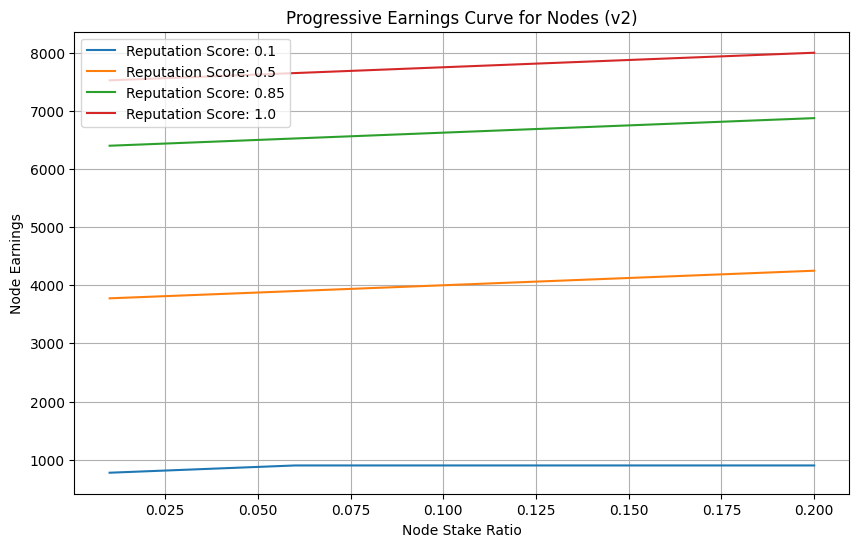

In [6]:
import matplotlib.pyplot as plt

# define parameters for visualization
base_emission = 10000  # M, base emission for illustration purposes
utilization_rate = 0.75  # U, assumed utilization rate
cap_ratio = 0.20  # k, cap ratio for stake-based earnings
node_stake_ratios = np.linspace(0.01, 0.20, 100)  # S, range of stake ratios from 1% to 20%
node_reputation_scores = np.array([0.1, 0.5, 0.85, 1.0])  # R, various reputation scores

# plot of earnings against stake ratios for different reputation scores
plt.figure(figsize=(10, 6))

for r in node_reputation_scores:
    node_earnings_improved = [
        calculate_node_earnings_improved(base_emission, utilization_rate, s, r, cap_ratio)
        for s in node_stake_ratios
    ]
    plt.plot(node_stake_ratios, node_earnings_improved, label=f'Reputation Score: {r}')

plt.title('Progressive Earnings Curve for Nodes (v2)')
plt.xlabel('Node Stake Ratio')
plt.ylabel('Node Earnings')
plt.legend()
plt.grid(True)
plt.show()